alibi-detect comes with several benchmark datasets for time-series:
1. fetch_ecg: ECG dataset from BIDMC Congestive Heart Failure Database.
2. fetch_nab: Numenta Anomaly Benchmark
3. fetch_kdd: KDD cup 99 dataset of computer network intrusions

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
from alibi_detect.datasets import fetch_kdd
intrusions = fetch_kdd(percent10=True)

In [1]:
from sklearn.datasets import fetch_kddcup99

In [2]:
intrusions = fetch_kddcup99()

In [3]:
intrusions['feature_names']

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

<Axes: >

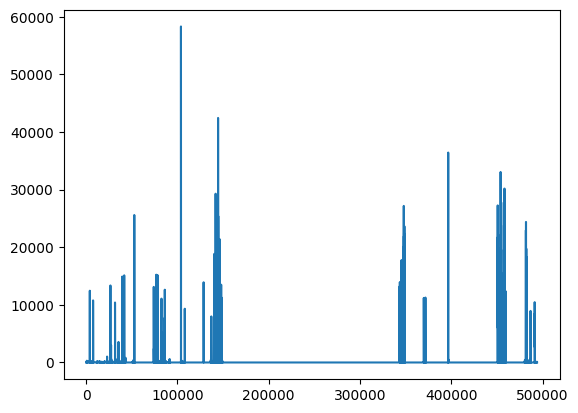

In [4]:
import pandas as pd
pd.Series(intrusions['data'][:,0]).plot()

In [6]:
from alibi_detect.od import SpectralResidual
od = SpectralResidual(
    threshold=1.,
    window_amp=20,
    window_local=20,
    n_est_points=10,
    n_grad_points=5
)

In [7]:
scores = od.score(intrusions['data'][:,0])

In [8]:
scores

array([-0.76955196, -0.48515735, -0.30824121, ..., -0.99269148,
       -0.04040116, -0.07349127])

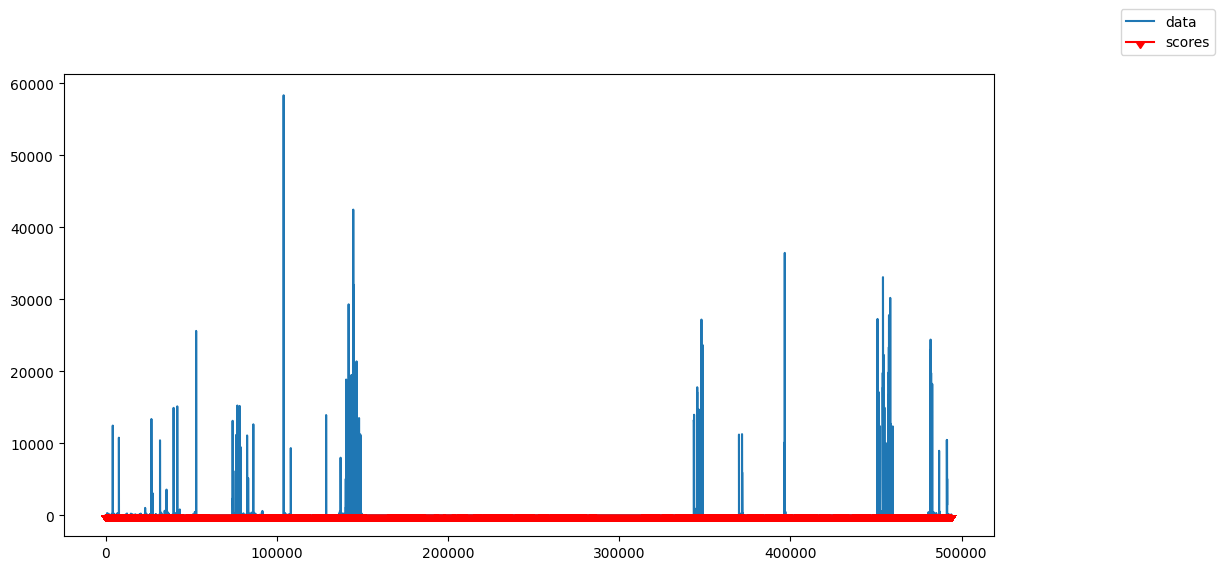

In [23]:
import matplotlib

ax = pd.Series(intrusions['data'][:, 0], name='data').plot(legend=False, figsize=(12, 6))
ax2 = ax
ax = pd.Series(scores, name='scores').plot(ax=ax2, legend=False, color='r', marker=matplotlib.markers.CARETDOWNBASE)
ax.figure.legend(bbox_to_anchor=(1, 1), loc='upper left');

## Change point detection

In [24]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

In [25]:
signal, bkps = rpt.pw_constant(
    n_samples=500, n_features=3, n_bkps=3,
    noise_std=5.0, delta=(1,20)
)

(<Figure size 1000x600 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

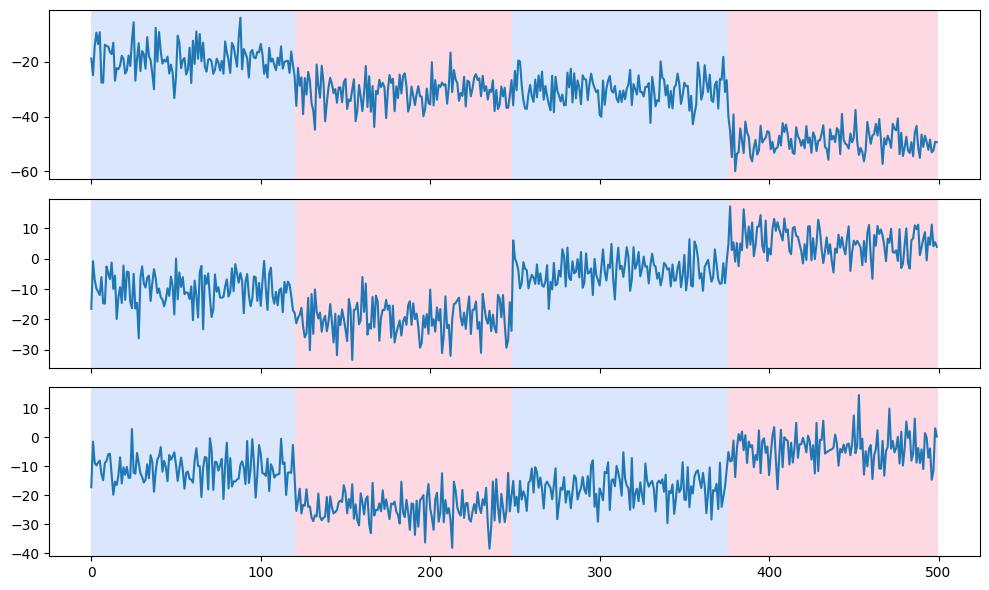

In [30]:
rpt.display(signal, bkps) ## Signal in Numpy array (550x3) - synthetic multivariate time-series

## Binary Segmentation

In [27]:
algo = rpt.Binseg(model="l1").fit(signal)
my_bkps = algo.predict(n_bkps=3)

In [28]:
my_bkps

[120, 250, 375, 500]

(<Figure size 1000x600 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

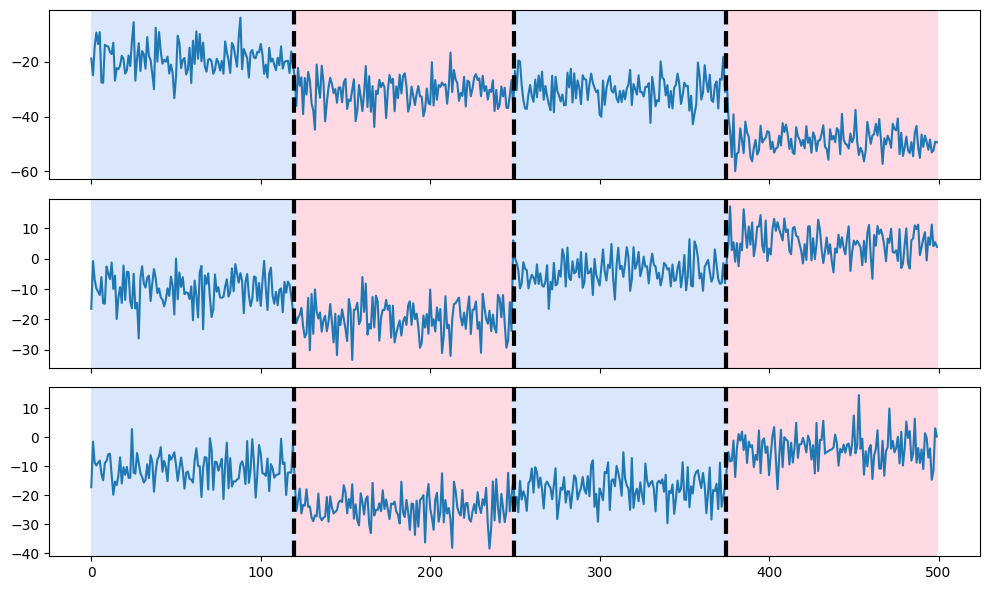

In [31]:
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))